In [262]:
#Dependencies and setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [263]:
#Import data
file = Path("../Resources/clean3data.csv")
df=pd.read_csv(file)
df.head()

,Unnamed: 0,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
0,652,2019,Albania,1852000000,2458000000,6406000,15401826080,2854191
1,218,2017,Albania,1473000000,2050000000,5118000,13019726211,2873457
2,869,2020,Albania,805000000,1243000000,2658000,15162734205,2837849
3,435,2018,Albania,1750000000,2306000000,5927000,15156424061,2866376
4,1,2016,Albania,1338000000,1821000000,4736000,11861199830,2876101


In [264]:
#Filter the data
df_filtered = df[(df["Year"]>= 2016) & (df["Year"]<= 2016)]
df_filtered.head()

,Unnamed: 0,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
4,1,2016,Albania,1338000000,1821000000,4736000,11861199830,2876101
6,2,2016,Algeria,556000000,246000000,2039000,160034212613,40339329
13,5,2016,Angola,823000000,628000000,397000,49840491178,29154746
18,6,2016,Antigua and Barbuda,101000000,844000000,874000,1436585185,90564
22,7,2016,Argentina,12273000000,5466000000,6668000,557532317363,43590368


In [265]:
#Clean the data 
clean_df1 = df_filtered.drop(["Unnamed: 0"], axis=1)
clean_df1

clean_df = clean_df1.sort_values(["Country Name"], ascending = True)
clean_df.head()

,Year,Country Name,International Tourism Expenditures (US$),International Tourism Receipts (US$),# of arrivals,GDP (US$),Total Population
4,2016,Albania,1338000000,1821000000,4736000,11861199830,2876101
6,2016,Algeria,556000000,246000000,2039000,160034212613,40339329
13,2016,Angola,823000000,628000000,397000,49840491178,29154746
18,2016,Antigua and Barbuda,101000000,844000000,874000,1436585185,90564
22,2016,Argentina,12273000000,5466000000,6668000,557532317363,43590368


In [266]:
def corfunction(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regressval = x * slope + intercept 
    plt.scatter(x,y,marker ="o",facecolors = "blue",edgecolors = "black")
    plt.plot(x,regressval,"r-")
    plt.annotate(equation,(5.8,0.8),fontsize=15,color="red")
    plt.grid
    labelx = abelx
    xlabel = labelx
    labely = abely
    ylabel = labely
    title1 = title2
    title = title1
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show
    return 

In [267]:
#Question 1 What Countries attract the most tourists?

In [268]:
#Find the Country that attracts the most tourists
inbound_tourist_df = clean_df[['Country Name','# of arrivals']]
inbound_tourist_df

inbound_df = inbound_tourist_df.sort_values(["# of arrivals"], ascending = False)
inbound_df.head(10)

inbound_df2 = inbound_df.head(10)
inbound_df2

,Country Name,# of arrivals
224,France,203042000
636,United States,175261484
381,Mexico,94853000
296,Italy,84925000
479,Poland,80476000
161,Croatia,57587000
268,"Hong Kong SAR, China",56655000
274,Hungary,52890000
242,Germany,35555000
590,Thailand,32530000


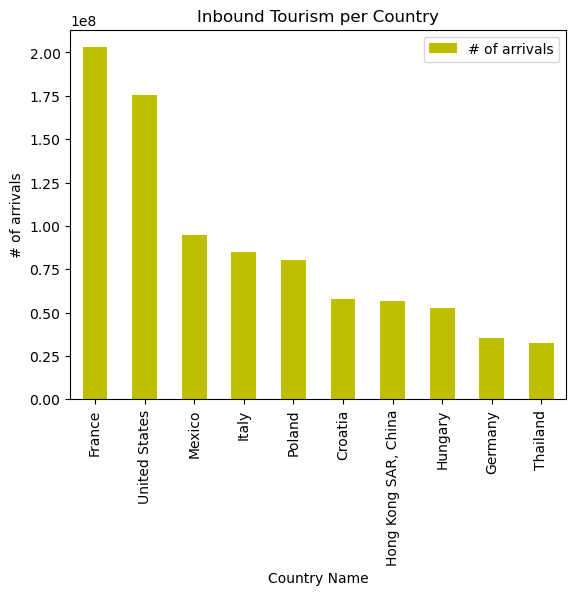

In [286]:
#Create a bar graph

plot_pandas = inbound_df2.set_index(['Country Name']).plot.bar(color = 'y')

#Set labels
plt.xlabel('Country Name')
plt.ylabel('# of arrivals')
plt.title('Inbound Tourism per Country')
plt.savefig("../png/2016bar1.png")
plt.show()

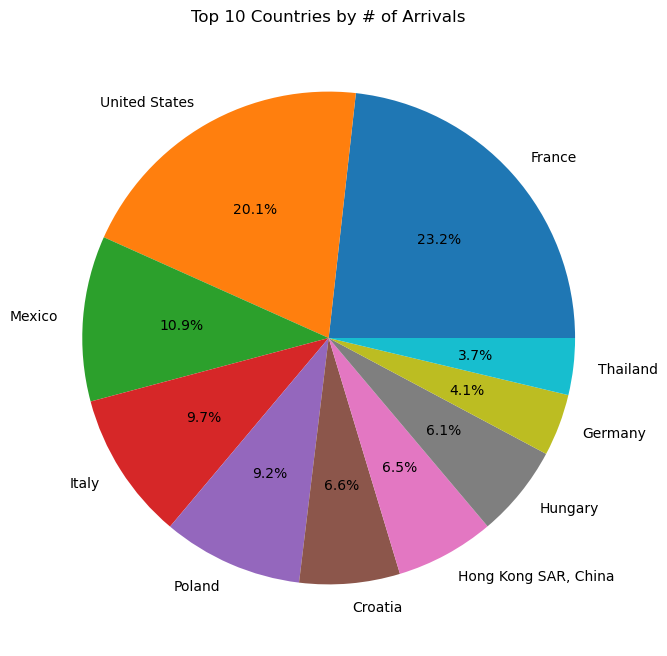

In [270]:
count = inbound_df2['# of arrivals']
labels = inbound_df2['Country Name']
plt.figure(figsize=(8, 8))
plt.pie(count, labels=labels, autopct= "%1.1f%%")
plt.title('Top 10 Countries by # of Arrivals')
plt.show()

In [ ]:
### France leads with the highest number of inbound tourists in 2016

In [271]:
### Question 2 What countries have the highest International Tourism Receipts?

In [272]:
#Find the countries with top tourism receipts
tourism1_df = clean_df[['Country Name', 'International Tourism Receipts (US$)', 'International Tourism Expenditures (US$)']]
tourism1_df

tourism2_df = tourism1_df.sort_values(["International Tourism Receipts (US$)"], ascending = False)
tourism2_df.head(10)

tourism2_df['International Tourism Receipts (US$)']/=1e10
tourism2_df['International Tourism Expenditures (US$)']/=1e10

tourism_df = tourism2_df.head(10)
tourism_df

,Country Name,International Tourism Receipts (US$),International Tourism Expenditures (US$)
636,United States,22.85490,14.764000
224,France,6.35570,4.902900
242,Germany,5.22340,8.741200
590,Thailand,4.84590,1.126700
296,Italy,4.24230,3.058400
35,Australia,3.90590,3.571800
268,"Hong Kong SAR, China",3.78380,2.414100
301,Japan,3.34560,2.596800
349,"Macao SAR, China",3.11550,0.150000
628,United Arab Emirates,2.86574,1.712726


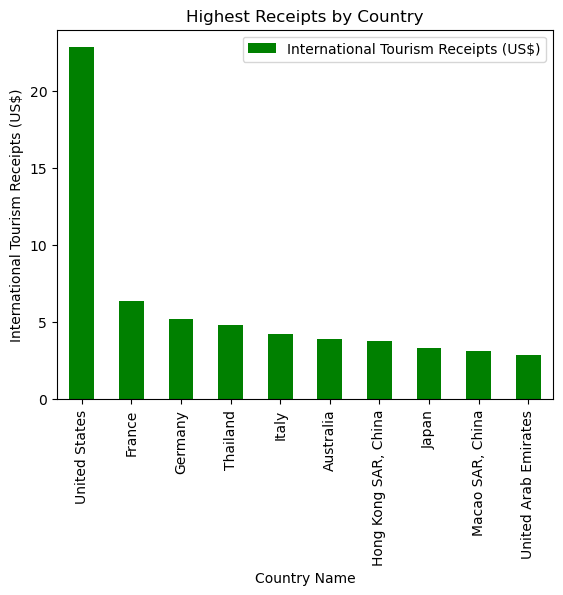

In [273]:
most_rec_df = tourism_df.drop([ "International Tourism Expenditures (US$)"], axis=1)
most_rec_df

plot_pandas = most_rec_df.set_index(['Country Name']).plot.bar(color = 'green')

#Set labels
plt.xlabel('Country Name')
plt.ylabel('International Tourism Receipts (US$)')
plt.title('Highest Receipts by Country')

plt.show()

Text(0, 0.5, 'Million')

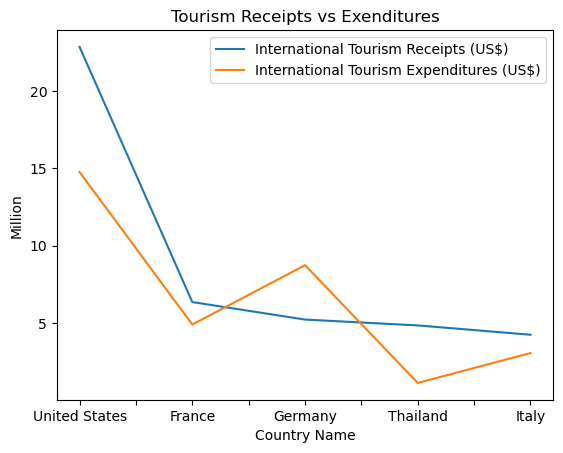

In [274]:
#Reshape the data to fit graph
tourism_shaped_df = tourism_df.head(5)
tourism_shaped_df

#Create a line graph
tourism_shaped_df.set_index(['Country Name']).plot()
plt.title('Tourism Receipts vs Exenditures')
plt.ylabel('Million')


In [ ]:
#Here we can see the US leads in both Receipts and expenditures for 2016
#This is a surprise as our first finding was that France has the most inbound tourists so we would expect France to also have the highest receipts

In [275]:
### Question 3 What Countries have the highest GDP? 

In [276]:
# Find the countries with the highest GDP
totalgdp_df = clean_df[['Country Name', 'GDP (US$)', 'Total Population', 'International Tourism Receipts (US$)']]
totalgdp_df

gdp1_df = totalgdp_df.sort_values(["GDP (US$)"], ascending= False)
gdp1_df.head(10)


gdp1_df['GDP (US$)']/=1e12
gdp1_df['Total Population']/=1e8
gdp1_df['International Tourism Receipts (US$)']/=1e10

gdp_df = gdp1_df.head(10)
gdp_df


,Country Name,GDP (US$),Total Population,International Tourism Receipts (US$)
636,United States,18.695111,3.230718,22.8549
301,Japan,5.003678,1.270760,3.3456
242,Germany,3.469853,0.823487,5.2234
224,France,2.472964,0.667241,6.3557
279,India,2.294797,13.386363,2.3111
296,Italy,1.877072,0.606275,4.2423
101,Brazil,1.795693,2.068596,0.6613
321,"Korea, Rep.",1.500112,0.512178,2.0924
502,Russian Federation,1.276786,1.443424,1.2822
35,Australia,1.206563,0.241909,3.9059


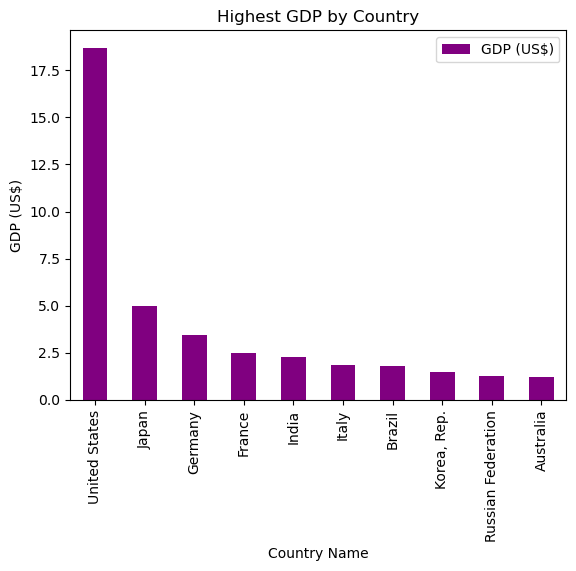

In [277]:
most_gdp_df = gdp_df.drop(["Total Population", "International Tourism Receipts (US$)"], axis=1)
most_gdp_df

plot_pandas = most_gdp_df.set_index(['Country Name']).plot.bar(color = 'purple')

#Set labels
plt.xlabel('Country Name')
plt.ylabel('GDP (US$)')
plt.title('Highest GDP by Country')

plt.show()

Text(0, 0.5, 'GDP in trillions & Population in millions')

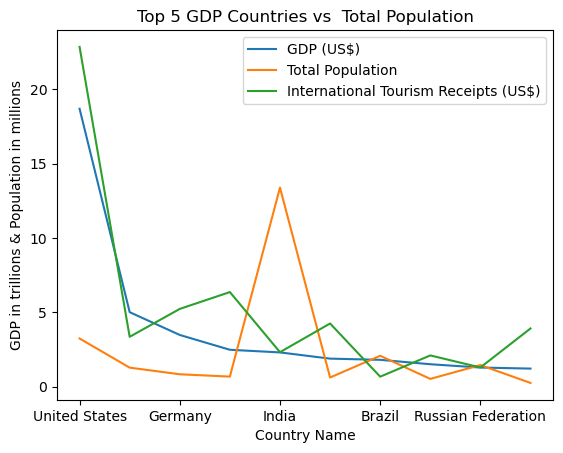

In [278]:
#Compare GDP to total population

gdp_df.set_index(['Country Name']).plot()
plt.title('Top 5 GDP Countries vs  Total Population')
plt.ylabel('GDP in trillions & Population in millions')


In [ ]:
### The US leads in total GDP amongst the other countries in 2016

In [279]:
### Question 4 What is the correlation?

The r-value is: 0.9309679692189445


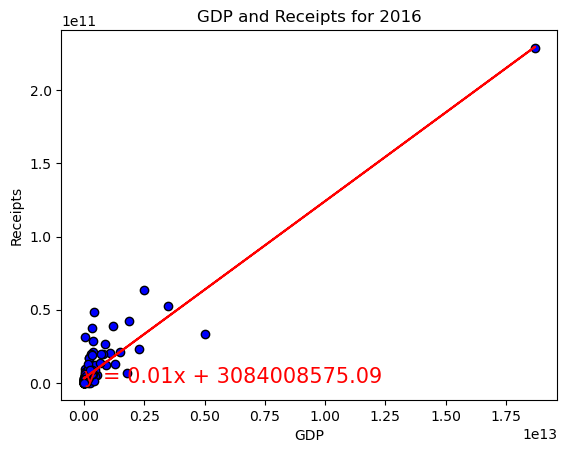

In [281]:
#Compare GDP to Receipts
x = df_filtered["GDP (US$)"]
y = df_filtered["International Tourism Receipts (US$)"]
abelx = "GDP"
abely = "Receipts"
title2 = "GDP and Receipts for 2016"
corfunction(x,y)


The r-value is: 0.7088375734774642


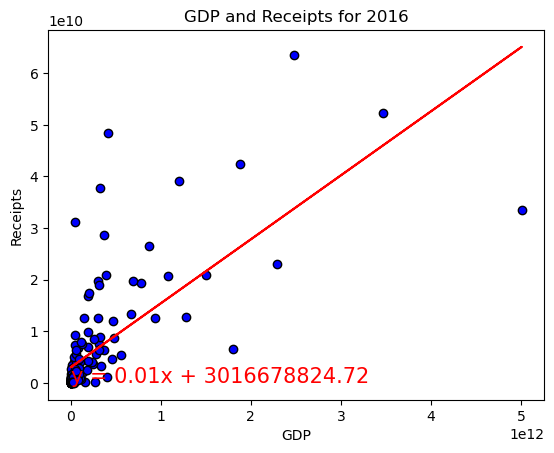

In [283]:
#Remove outliers 
df_filtered = clean_df[clean_df["Country Name"] != "United States"]

x = df_filtered["GDP (US$)"]
y = df_filtered["International Tourism Receipts (US$)"]
abelx = "GDP"
abely = "Receipts"
title2 = "GDP and Receipts for 2016"
corfunction(x,y)

In [ ]:
### We see here that when we remove the US an outlier our correlation probability drops from 93% to 70%

The r-value is: 0.48551218218271136


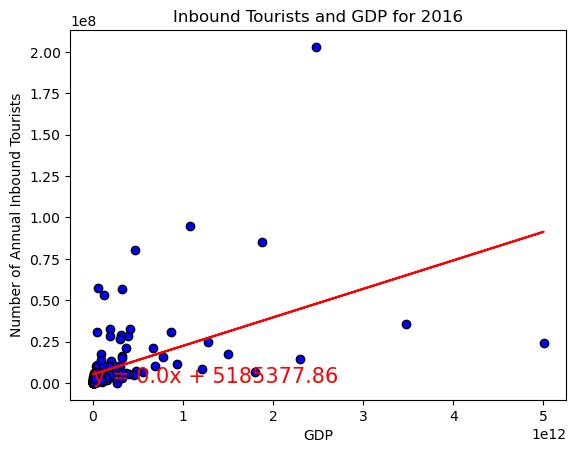

In [284]:
#Compare # of arrivals with GDP
x = df_filtered["GDP (US$)"]
y = df_filtered["# of arrivals"]
abelx = "GDP"
abely = "Number of Annual Inbound Tourists"
title2 = "Inbound Tourists and GDP for 2016"
corfunction(x,y)

In [ ]:
### We see here that our correlation coefficient is fairly low, signaling to us that inbound tourists does not necessarily affect the country's GDP
### This is also supported by France leading in inbound tourists but not Receipts and GDP, where the US leads those categories while having less inbound tourists